In [1]:
import dlib

In [2]:
import face_recognition
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
KNOWN_FACES_DIR = "known_faces"
UNKNOWN_FACES_DIR = "unknown_faces"
TOLERANCE = 0.6
FRAME_THICKNESS = 3
FONT_THICKNESS = 2
MODEL = "cnn"
print("loading known faces")
known_faces = []
known_names = []

for name in os.listdir(KNOWN_FACES_DIR):
    for filename in os.listdir(f"{KNOWN_FACES_DIR}/{name}"):
        image = face_recognition.load_image_file(f"{KNOWN_FACES_DIR}/{name}/{filename}")
        encoding = face_recognition.face_encodings(image)
        known_faces.append(encoding)
        known_names.append(name)
print("processing unknown faces")
for filename in os.listdir(UNKNOWN_FACES_DIR):
    print(filename)
    image = face_recognition.load_image_file(f"{UNKNOWN_FACES_DIR}/{filename}")
    locations = face_recognition.face_locations(image,model=MODEL)
    encodings = face_recognition.face_encodings(image,locations)
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    
    for face_encoding ,face_location in zip(encodings,locations):
        results = face_recognition.compare_faces(known_faces,face_encoding,TOLERANCE)
        match = None
        if True in results:
            match = known_names[results.index(True)]
            print("Match Found:{match}")
            
            top_left = (face_location[3],face_location[0])
            bottom_right = (face_location[1],face_location[2])
            color = [0,255,0]
            
            

loading known faces
processing unknown faces
snowdex.jpg


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

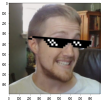

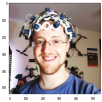

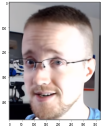

In [28]:
for name in os.listdir(KNOWN_FACES_DIR):
    i=1
    for filename in os.listdir(f"{KNOWN_FACES_DIR}/{name}"):
        im = Image.open(f"{KNOWN_FACES_DIR}/{name}/{filename}")
        plt.figure(figsize = (20,20),dpi=20)
        plt.subplot(1,3,i)
        i=i+1
        plt.imshow(im)